In [1]:
import requests
import pandas as pd


# Data

## Raw Data

In [2]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [3]:
response=requests.get(query)


In [4]:
df = pd.DataFrame(response.json()['historical'])

In [5]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-02,48840.414063,49817.667969,48767.839844,49598.503906,49598.503906,3.908957e+10,3.908957e+10,758.08984,1.552,49394.67057,"September 02, 21",0.01552
1,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
2,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
3,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
4,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1823,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1824,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
1825,2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
import math

# 1 year Data

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df_2 = df[['date', 'adjClose']]

In [9]:
date = pd.to_datetime('2020-08-31')

In [10]:
df_lastyear = df_2[df_2['date']>date]

In [11]:
df_lastyear = df_lastyear.set_index('date')

In [12]:
df_lastyear

,adjClose
date,
2021-09-02,49598.503906
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
2021-08-29,48829.832031
...,...
2020-09-05,10169.567383
2020-09-04,10511.813477
2020-09-03,10245.296875


## Time Series plot

<AxesSubplot:xlabel='date'>

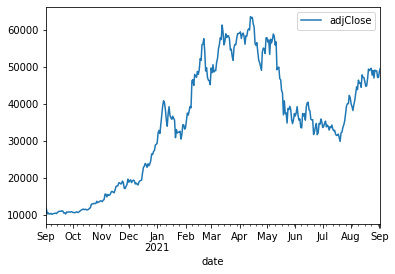

In [13]:
df_lastyear.plot()

# ML approach to TS

## Continuous (train ➔ test) split 

In [14]:
# 80/20 Train-test split
train_size = 0.8
index = round(train_size*df_lastyear.shape[0])
df_train = df_lastyear.iloc[:index]
df_test = df_lastyear.iloc[index:]

In [15]:
from sklearn.metrics import r2_score

## Test split

In [16]:
df_test

,adjClose
date,
2020-11-12,16276.343750
2020-11-11,15701.339844
2020-11-10,15290.902344
2020-11-09,15332.315430
2020-11-08,15479.567383
...,...
2020-09-05,10169.567383
2020-09-04,10511.813477
2020-09-03,10245.296875


## Train split

In [17]:
df_train

,adjClose
date,
2021-09-02,49598.503906
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
2021-08-29,48829.832031
...,...
2020-11-17,17645.406250
2020-11-16,16716.111328
2020-11-15,15955.587891


### Whatever value was in the previous time period, we use that to predict the next value. Using .shift, we shift the data by 1. 

In [18]:
y_pred = df_test.shift(1)
y_pred

,adjClose
date,
2020-11-12,NaN
2020-11-11,16276.343750
2020-11-10,15701.339844
2020-11-09,15290.902344
2020-11-08,15332.315430
...,...
2020-09-05,10280.351563
2020-09-04,10169.567383
2020-09-03,10511.813477


In [19]:
y_true = df_test[1:]

In [20]:
y_true.shape

(72, 1)

In [22]:
y_test = df_test.drop(['2020-11-12'])

In [23]:
y_test

,adjClose
date,
2020-11-11,15701.339844
2020-11-10,15290.902344
2020-11-09,15332.315430
2020-11-08,15479.567383
2020-11-07,14833.753906
...,...
2020-09-05,10169.567383
2020-09-04,10511.813477
2020-09-03,10245.296875


### Very good R2 score.

In [24]:
y_pred = df_test.shift(1).dropna()
print(f"R2:{r2_score(y_true, y_pred)}")

R2:0.9545132259605507


In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print('MSE =', round(mse, 2))
print('MAE =', round(mae, 2))
print('MAPE =', round(mape, 2))

MSE = 118299.43
MAE = 224.33
MAPE = 0.02


#### Taking a years worth of historic features to predict the current value with 12 auto-regressive features

In [26]:
df2 = df_lastyear.copy()
df2_train = df_train.copy() 
df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['adjClose'].shift(i)
    df2_test[f't - {i}'] = df_test['adjClose'].shift(i)

df2_train.dropna(inplace=True)    
df2_test.dropna(inplace=True)    
df2_train.head()

,adjClose,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
date,,,,,,,,,,,,,
2021-08-21,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500,48847.027344,49598.503906
2021-08-20,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500,48847.027344
2021-08-19,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500
2021-08-18,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375
2021-08-17,44695.359375,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031


In [27]:
# Train Test Split
X2_train = df2_train.drop(columns = ['adjClose'])
y2_train = df2_train['adjClose']
X2_test = df2_test.drop(columns = ['adjClose'])
y2_test = df2_test['adjClose']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(282, 12) (282,) (61, 12) (61,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
import matplotlib.pyplot as plt

R2:  0.9025840046257695


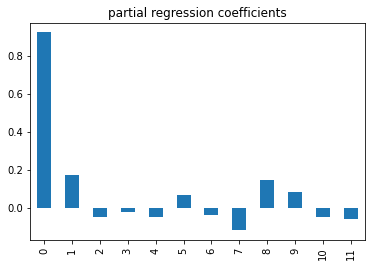

In [30]:
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

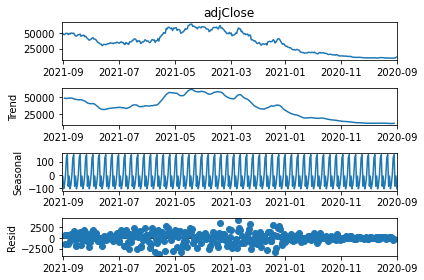

In [32]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(df_lastyear['adjClose'], model='additive')
result_add.plot();

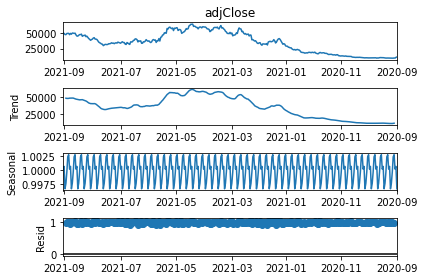

In [33]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(df_lastyear['adjClose'], model='multiplicative')
result_mul.plot();

## Remove essence of time for our modelling, so that we have our residuals which cannot explain at the time.

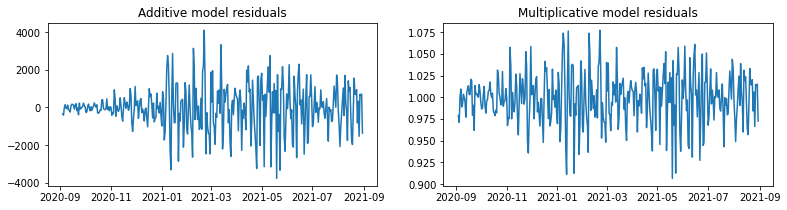

In [34]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

In [35]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_lastyear.adjClose)[1]

0.8434505079679788

In [36]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  3.9449481137623726e-11
multipl resid:  5.1567889578141575e-20


In [37]:
from statsmodels.graphics.tsaplots import plot_acf

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf

## Monthly seasonality, as lags peak around 30th day (Slow exponential decrease)

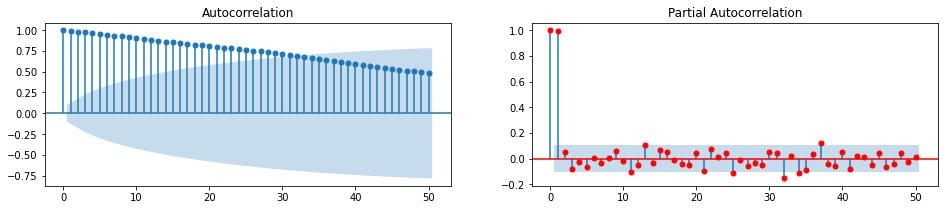

In [39]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df_lastyear.adjClose, lags=50, ax=axes[0]);
plot_pacf(df_lastyear.adjClose, lags=50, ax=axes[1], color='r');

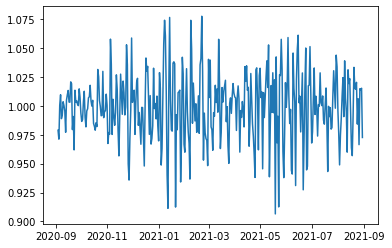

In [40]:
plt.plot(result_mul.resid)

<AxesSubplot:ylabel='Density'>

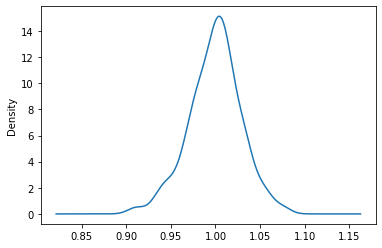

In [41]:
result_mul.resid.plot(kind='kde')

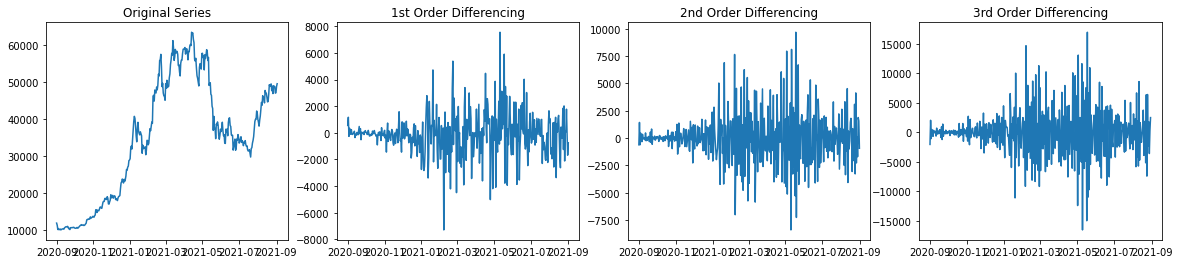

In [42]:
zero_diff = df_lastyear.adjClose
first_order_diff = df_lastyear.adjClose.diff(1)
second_order_diff = df_lastyear.adjClose.diff(1).diff(1)
third_order_diff = df_lastyear.adjClose.diff(1).diff(1).diff(1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing')
ax4.plot(third_order_diff); ax4.set_title('3rd Order Differencing');

In [43]:
print('p-value zero-diff: ', adfuller(df_lastyear['adjClose'])[1])
print('p-value first-diff: ', adfuller(df_lastyear['adjClose'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(df_lastyear['adjClose'].diff().diff().dropna())[1])

p-value zero-diff:  0.8434505079679788
p-value first-diff:  2.7322387369633917e-06
p-value second-diff:  3.135560552847029e-14


In [44]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_lastyear['adjClose'])

1

In [45]:
y_diff = first_order_diff.dropna()

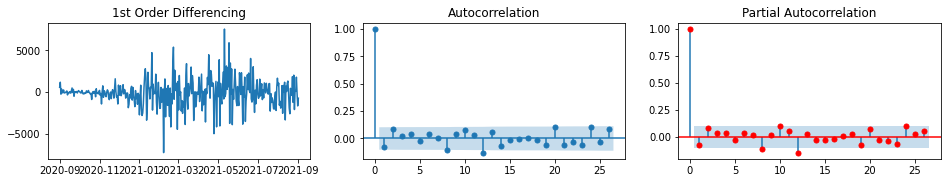

In [46]:
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [47]:
from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
# from statsmodels.tsa.arima.model import ARIMA #statsmodels 0.12

In [48]:
arima = ARIMA(df['adjClose'], order=(1,1,1))
arima = arima.fit()
arima.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08373D+00    |proj g|=  1.58096D-05

At iterate    5    f=  8.08373D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   0.000D+00   8.084D+00
  F =   8.0837296159500394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14760.890
Method:                       css-mle   S.D. of innovations            784.298
Date:                Thu, 02 Sep 2021   AIC                          29529.781
Time:                        09:22:38   BIC                          29551.820
Sample:                             1   HQIC                         29537.910
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.8467     17.569     -1.528      0.127     -61.282       7.589
ar.L1.D.adjClose    -0.5751      0.156     -3.687      0.000      -0.881      -0.269
ma.L1.D.adjClose     0.5078      0.164      3.100      0.002       0.187       0.829
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7388           +0.0000j            1.7388            0.5000
MA.1           -1.9694           +0.0000j            1.9694            0.5000
-----------------------------------------------------------------------------
"""

In [49]:
import pmdarima as pm
smodel = pm.auto_arima(df['adjClose'],
                       start_p=0, max_p=3,
                       start_q=0, max_q=3,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29538.125, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29532.417, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29532.923, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29538.249, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29531.989, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29533.226, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29532.630, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29532.279, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29533.846, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=29532.176, Time=0.06 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 2.415 seconds


In [55]:
arima2 = ARIMA(df['adjClose'], order=(2,1,0))
arima2 = arima2.fit()
arima2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08268D+00    |proj g|=  5.48361D-04

At iterate    5    f=  8.08268D+00    |proj g|=  1.74083D-05

At iterate   10    f=  8.08268D+00    |proj g|=  2.76401D-04

At iterate   15    f=  8.08267D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   0.000D+00   8.083D+00
  F =   8.0826749446918118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1826
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -14758.964
Method:                       css-mle   S.D. of innovations            783.470
Date:                Thu, 02 Sep 2021   AIC                          29525.929
Time:                        09:23:14   BIC                          29547.968
Sample:                             1   HQIC                         29534.059
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.9110     18.568     -1.449      0.147     -63.304       9.482
ar.L1.D.adjClose    -0.0579      0.023     -2.480      0.013      -0.104      -0.012
ar.L2.D.adjClose     0.0705      0.023      3.017      0.003       0.025       0.116
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3780           +0.0000j            3.3780            0.5000
AR.2            4.1991           +0.0000j            4.1991            0.0000
-----------------------------------------------------------------------------
"""

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

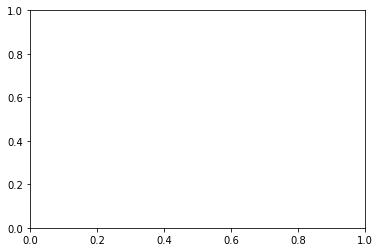

In [63]:
arima2.plot_predict(end='2021-09-01');
fig = plt.gcf(); fig.set_size_inches(12, 5);

In [52]:
import numpy as np

In [53]:
(forecast, stderr, conf_int) = arima2.forecast(15, alpha=0.05)

In [54]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])